In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision import transforms

from lxml import etree
from matplotlib.patches import Rectangle
import glob

from PIL import Image

In [3]:
xml = open(r'../data/Oxford-IIIT Pets Dataset/annotations/xmls/Abyssinian_1.xml').read()
select = etree.HTML(xml)

In [8]:
width = int(select.xpath('//size/width/text()')[0])
height = int(select.xpath('//size/height/text()')[0])
xmin = int(select.xpath('//bndbox/xmin/text()')[0])
ymin = int(select.xpath('//bndbox/ymin/text()')[0])
xmax = int(select.xpath('//bndbox/xmax/text()')[0])
ymax = int(select.xpath('//bndbox/ymax/text()')[0])
width, height, xmin, ymin, xmax, ymax

(600, 400, 333, 72, 425, 158)

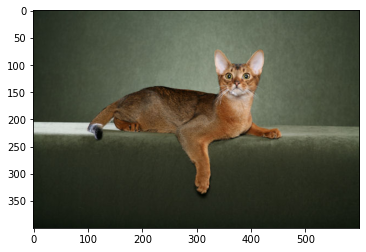

In [9]:
pilimg = Image.open(r'../data/Oxford-IIIT Pets Dataset/images/Abyssinian_1.jpg')
npimg = np.array(pilimg)
plt.imshow(npimg)

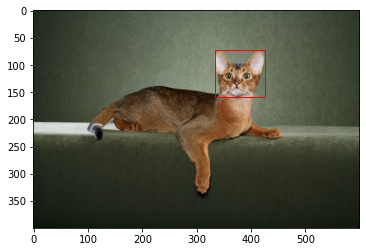

In [10]:
plt.imshow(npimg)
rect = Rectangle((xmin, ymin), (xmax - xmin), (ymax - ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [11]:
NEWSIZE = 224
new_pilimg = pilimg.resize((NEWSIZE, NEWSIZE))
xmin = xmin*NEWSIZE/width
ymin = ymin*NEWSIZE/height
xmax = xmax*NEWSIZE/width
ymax = ymax*NEWSIZE/height

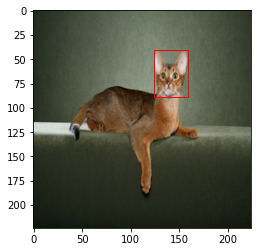

In [13]:
plt.imshow(new_pilimg)
rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [15]:
all_imgs = glob.glob(r'../data/Oxford-IIIT Pets Dataset/images/*.jpg')
all_xmls = glob.glob(r'../data/Oxford-IIIT Pets Dataset/annotations/xmls/*.xml')
len(all_imgs), len(all_xmls)

(5052, 3686)

In [16]:
all_xmls_labels = [x.split('\\')[-1].split('.xml')[0] for x in all_xmls]
all_xmls_labels[:5]

['Abyssinian_1',
 'Abyssinian_10',
 'Abyssinian_100',
 'Abyssinian_101',
 'Abyssinian_102']

In [17]:
all_train_imgs = [
    img for img in all_imgs if img.split('\\')[-1].split('.jpg')[0] in all_xmls_labels
]
len(all_train_imgs)

2539